In [1]:
import os
import json
import cv2

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
from IPython.display import FileLink, FileLinks
from skimage.segmentation import mark_boundaries

from fast_slic import Slic

In [4]:
%matplotlib inline

In [5]:
S = Slic(num_components=100,compactness=30)
def show(img_name: str, super_pixeler=S, scaled=False):
    '''
        Function for displaying image with overlayed borders of found superpixels, labeled by number
    '''
    current_img = cv2.cvtColor(cv2.imread(f'img/{img_name}.jpg'), cv2.COLOR_BGR2RGB)
    lbls = super_pixeler.iterate(current_img)
    res = mark_boundaries(current_img,lbls,color=(219,112,147), outline_color=(0,0,0))
    for i in range(0,lbls.max()+1):
        moments = cv2.moments((lbls==i).astype(np.uint8))
        center_x = int(moments["m10"] / moments["m00"])
        center_y = int(moments["m01"] / moments["m00"])
        cv2.putText(res,str(i),(center_x-10,center_y+10), cv2.FONT_HERSHEY_PLAIN ,1.5,(0,0,0),4, cv2.LINE_AA)
        cv2.putText(res,str(i),(center_x-10,center_y+10), cv2.FONT_HERSHEY_PLAIN ,1.5,(255,255,255),2, cv2.LINE_AA)
    fig, axs = plt.subplots(2,1,figsize=(16,20))
    axs[0].imshow(res)
    axs[1].imshow(current_img)
    return fig

In [6]:
def load_data(idx):
    '''
        Wrapping function for `show`, handles with int names
    '''
    if not isinstance(idx, str):
        idx = str(idx)
    idx = idx.zfill(3)
    figs = show(idx)
    print(f'{figs is None}')
    return figs

def write_data(idx):
    '''
        Function for writing anotation for displayed images
    '''
     if not isinstance(idx, str):
        idx = str(idx)
    idx = idx.zfill(3)
    if os.path.exists(f'./ann/{idx}.json'):
        print('Overwrite [Y/N]?')
        if input() != 'Y':
            return None
    print('input smoke numbers')
    smoke = input().split()
    print('input fire numbers')
    fire = input().split()
    data = {'fire':fire,'smoke':smoke}
    with open(f'./ann/{idx}.json', 'w') as f:
        json.dump(data, f)

In [34]:
class DownloadFileLink(FileLink):
    '''
        Class for providing clickable downloading links onto files on (remote) server
    '''


    html_link_str = "<a href='{link}' download={file_name}>{link_text}</a>"

    def __init__(self, path, file_name=None, link_text=None, *args, **kwargs):
        super(DownloadFileLink, self).__init__(path, *args, **kwargs)

        self.file_name = file_name or os.path.split(path)[1]
        self.link_text = link_text or self.file_name

    def _format_path(self):
        from html import escape
        fp = ''.join([self.url_prefix, escape(self.path)])
        return ''.join([self.result_html_prefix,
                        self.html_link_str.format(link=fp, file_name=self.file_name, link_text=self.link_text),
                        self.result_html_suffix])

In [ ]:
DownloadFileLink('Shlik.ipynb')

In [30]:
! zip -r img.zip img/

  adding: img/ (stored 0%)
  adding: img/134.jpg (deflated 0%)
  adding: img/059.jpg (deflated 3%)
  adding: img/123.jpg (deflated 1%)
  adding: img/032.jpg (deflated 4%)
  adding: img/091.jpg (deflated 1%)
  adding: img/149.jpg (deflated 1%)
  adding: img/026.jpg (deflated 0%)
  adding: img/093.jpg (deflated 0%)
  adding: img/037.jpg (deflated 3%)
  adding: img/025.jpg (deflated 3%)
  adding: img/052.jpg (deflated 9%)
  adding: img/126.jpg (deflated 1%)
  adding: img/061.jpg (deflated 3%)
  adding: img/002.jpg (deflated 0%)
  adding: img/012.jpg (deflated 3%)
  adding: img/150.jpg (deflated 1%)
  adding: img/085.jpg (deflated 1%)
  adding: img/044.jpg (deflated 6%)
  adding: img/118.jpg (deflated 0%)
  adding: img/094.jpg (deflated 0%)
  adding: img/020.jpg (deflated 3%)
  adding: img/110.jpg (deflated 0%)
  adding: img/079.jpg (deflated 1%)
  adding: img/064.jpg (deflated 9%)
  adding: img/048.jpg (deflated 8%)
  adding: img/084.jpg (deflated 0%)
  adding: img/124.jpg (deflated 1%)
 

In [7]:
def start_from(n0=0,n1=-1):
    if type(n0) == list:
        rg = n0
    else:
        if n1==-1:
            n1 = len(os.listdir('./img'))
        rg = range(n0,n1)
    for i in rg:
        clear_output()
        figs = load_data(i)
        plt.show()
        write_data(i)

In [8]:
from PIL import Image

In [22]:
iim_ = cv2.imread('./img/107.jpg')

In [25]:
iim_ = cv2.resize(cv2.imread('./img/107.jpg'), (500,400), cv2.INTER_AREA)

In [26]:
%%time

S = Slic(num_components=100,compactness=30)
lbls = S.iterate(iim_)

CPU times: user 52.8 ms, sys: 222 µs, total: 53 ms
Wall time: 34.1 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


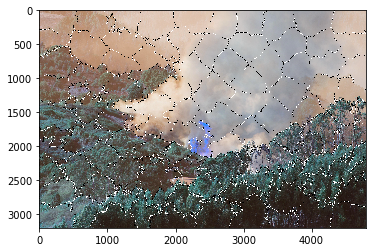

In [15]:
S = Slic(num_components=100,compactness=30)
lbls = S.iterate(iim_)
plt.imshow(mark_boundaries(iim_,lbls,color=(219,112,147), outline_color=(0,0,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


False


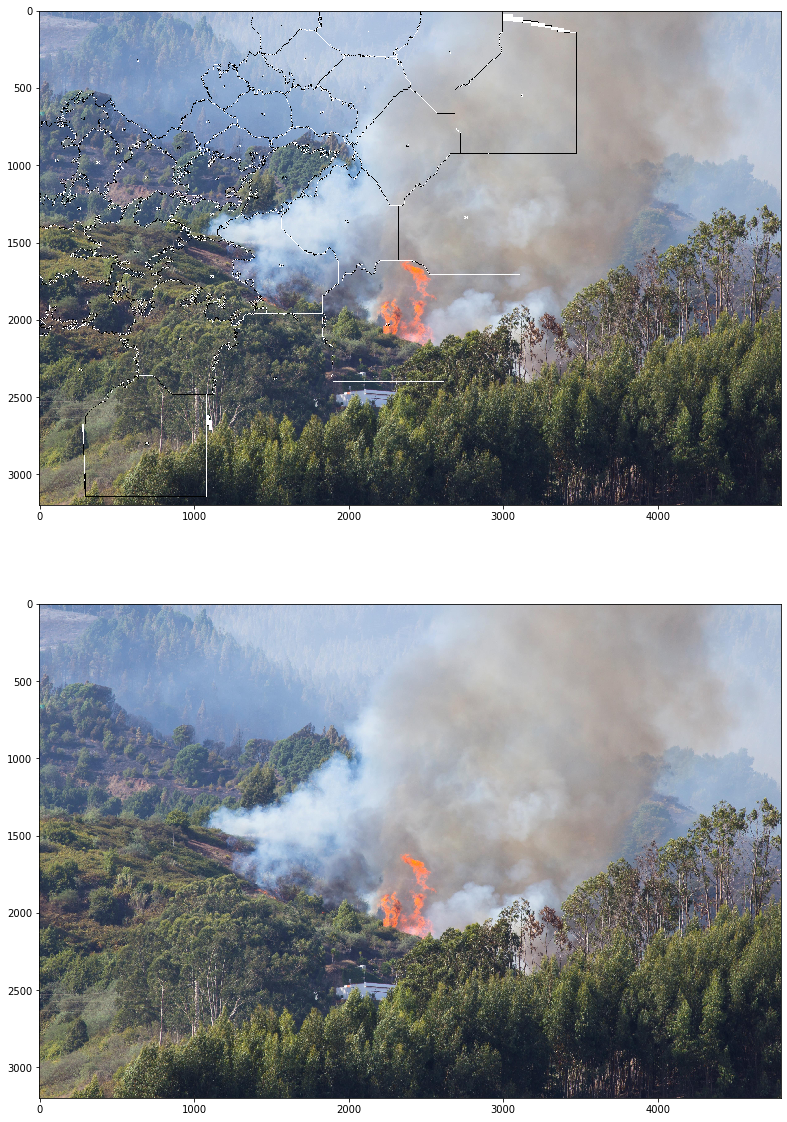

input smoke numbers


KeyboardInterrupt: 

In [12]:
start_from(107)